# Análisis de datos de Covid-19 en Bahía Blanca

Comienzo leyendo los datos de Covid-19 del archivo proporcionado por la cátedra

In [2]:
import pandas as pd

df_casos = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')
df_casos

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


Grafico los datos:

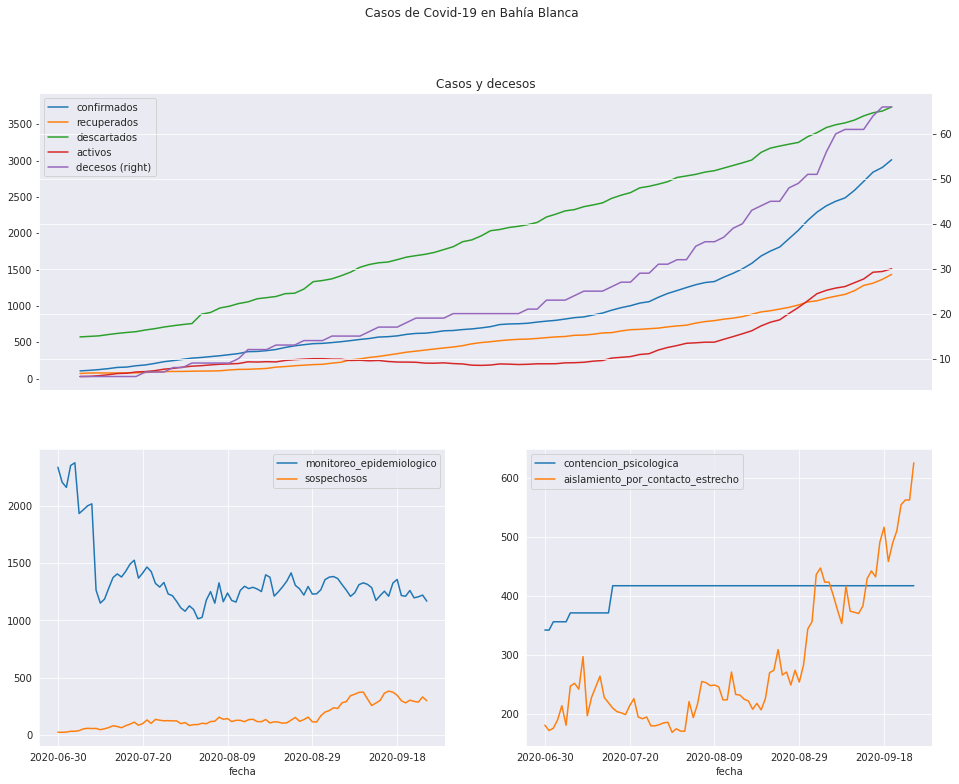

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(16,12))
fig.suptitle('Casos de Covid-19 en Bahía Blanca')

ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,2,3)
ax3=plt.subplot(2,2,4)
df_casos.plot.line(ax=ax1, x='fecha', y=['confirmados','recuperados','descartados','activos'], title='Casos y decesos')
df_casos.plot.line(ax=ax1, x='fecha', y=['decesos'], secondary_y=True)
df_casos.plot.line(ax=ax2, x='fecha', y=['monitoreo_epidemiologico','sospechosos'])
df_casos.plot.line(ax=ax3, x='fecha', y=['contencion_psicologica','aislamiento_por_contacto_estrecho'])

En primer lugar me fijo que se cumpla: activos = confirmados - recuperados - decesos

In [4]:
import numpy as np

activos = df_casos['confirmados'] - df_casos['recuperados'] - df_casos['decesos']
print('Cantidad de diferentes entre activos calculados y leídos del dataset:', np.sum(activos != df_casos['activos']))

Cantidad de diferentes entre activos calculados y leídos del dataset: 0


Los datos del primer gráfico parecieran estar bien, ya que lo anterior se cumple. Lo interesante es ver que la cantidad de casos descartados pareciera seguir una tendencia lineal. Para comprobarlo, grafico la cantidad de casos descartados por día:

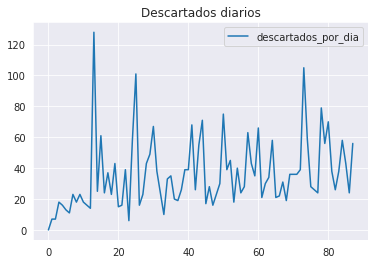

In [5]:
df_casos['descartados_por_dia'] = np.insert(np.diff(df_casos['descartados']), 0, 0)
df_casos.plot.line(y='descartados_por_dia', title='Descartados diarios')

Como estos datos parecen tener ruido, los grafico semanalmente:

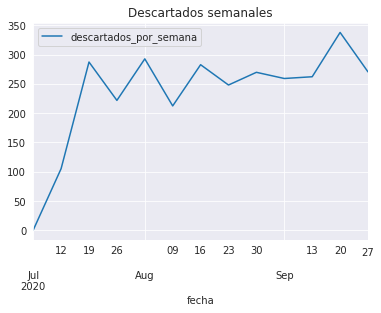

In [6]:
df_casos_copy = df_casos[['fecha','descartados']].copy()
df_casos_copy['fecha'] = pd.to_datetime(df_casos_copy['fecha'])
df_casos_copy.set_index('fecha', inplace=True)
df_casos_copy = df_casos_copy.resample('w').mean()
df_casos_copy['descartados_por_semana'] = np.insert(np.diff(df_casos_copy['descartados']), 0, 0)
df_casos_copy.plot.line(y='descartados_por_semana', title='Descartados semanales')

Como puede verse, los casos descartados por semana son considerablemente constantes y no parecen depender mucho de la cantidad de casos. Imagino que podría deberse a que en el inicio de la pandemia los tests escaseaban más, y a medida que se incrementaba la cantidad de casos confirmados, los médicos que decidían si hisopaban o no a los pacientes se ponían más estrictos en esta decisión. Esto podría hacer que el incremento en la cantidad de personas no contagiadas que piden hisoparse se compense con el aumento en lo estrictos que son los médicos para decidir si se hisopan o no. Sería interesante tener más datos para confirmar esto, ya que si se mantiene una tendencia tan lineal en el tiempo parecería que el crecimiento lineal en los casos descartados podría ser una decisión política o algo similar.

Finalmente, el resto de las variables parece tener un comportamiento esperado. En el caso de la contención psicológica, el hecho de que sea constante a tramos podría ser debido al límite en la cantidad de personal dedicado a esta tarea.

Hago el mismo análisis para los datos hospitalarios:

In [7]:
df_camas = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')
df_camas

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


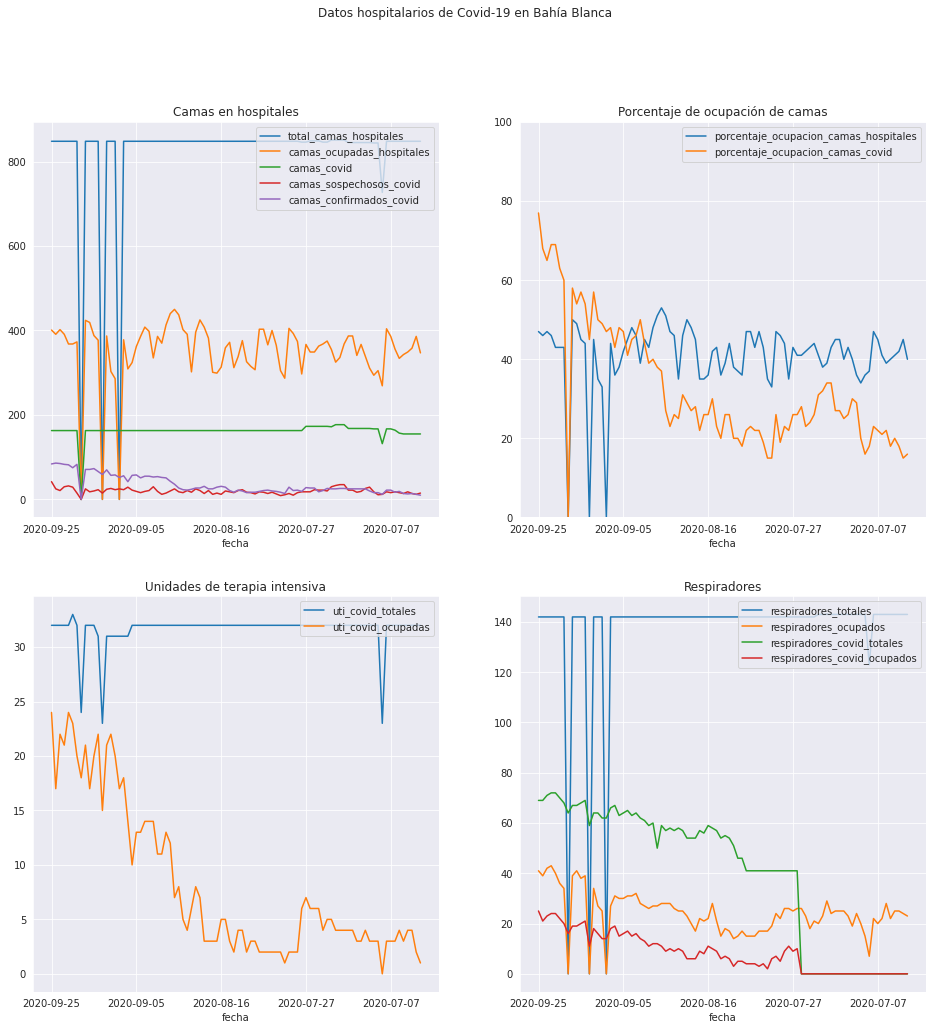

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16,16))
fig.suptitle('Datos hospitalarios de Covid-19 en Bahía Blanca')

df_camas.plot.line(ax=axes[0,0], x='fecha', y=['total_camas_hospitales','camas_ocupadas_hospitales','camas_covid',
                                               'camas_sospechosos_covid','camas_confirmados_covid'], title='Camas en hospitales')
axes[0,0].legend(loc='upper right')
df_camas.plot.line(ax=axes[0,1], x='fecha', y=['porcentaje_ocupacion_camas_hospitales','porcentaje_ocupacion_camas_covid'],
                   ylim=(0,100), title='Porcentaje de ocupación de camas')
df_camas.plot.line(ax=axes[1,0], x='fecha', y=['uti_covid_totales','uti_covid_ocupadas'], title='Unidades de terapia intensiva')
df_camas.plot.line(ax=axes[1,1], x='fecha', y=['respiradores_totales','respiradores_ocupados','respiradores_covid_totales',
                                              'respiradores_covid_ocupados'], title='Respiradores')
axes[1,1].legend(loc='upper right')
axes[1,0].legend(loc='upper right')

En este dataset se puede ver que algunas variables como total_camas_hospitales o respiradores_totales valen cero cada tanto tiempo lo cual parece ser un error al ingresar los datos o un dato faltante. La variable uti_covid_totales también tiene "picos" hacia abajo pero que no valen cero, lo cual no parece ser un error y podría indicar que en determinados días hay UTIs que no están disponibles. Finalmente, en los datos de respiradores parecen haber datos faltantes ya que luego de determinado día las variables respiradores_covid_totales y respiradores_covid_ocupados se hacen cero.